# Impact of using I-type blocks in P-type frames

In [1]:
sequence = "bus"

In [2]:
!../sequences/$sequence/runme.sh

bus_cif.y4m exists.
ffmpeg version n4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid --enable-nvdec --

## Without I-type blocks

In [6]:
!sed -z -i 's/\n#import image_IPP as codec\n/\nimport image_IPP as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as codec\n/\n#import image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as codec\n/\n#import MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py

!sed -z -i 's!\ntransform = "DWT"\n!\n#transform = "DWT"\n!g' config.py
!sed -z -i 's!\ntransform = "LT"\n!\n#transform = "LT"\n!g' config.py
!sed -z -i 's!\n#transform = None\n!\ntransform = None\n!g' config.py

In [7]:
!cat -n RD_curve.py | grep "import"
!cat -n config.py | grep "transform"

     5	import config
     6	import distortion
     7	import frame
    10	#import image_interpolated_IPP as codec
    11	import image_IPP as codec
    12	#import image_IPP_adaptive as codec
    13	#import MP4 as codec
    14	#import IPP_compressor as codec
     3	#transform = "DWT"
     4	#transform = "LP"
     5	transform = None


In [8]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

     1	Q_step: 21 BPP: 0.2963681958473625 KBPS: 2704.016 Average AMSE: 88.66902510346522
     2	Q_step: 24 BPP: 0.21520675505050504 KBPS: 1963.512 Average AMSE: 144.2772261460087
     3	Q_step: 27 BPP: 0.15241126543209876 KBPS: 1390.576 Average AMSE: 239.33226338909935
     4	Q_step: 30 BPP: 0.10863145342312008 KBPS: 991.136 Average AMSE: 357.34598502384966
     5	Q_step: 33 BPP: 0.07962436868686869 KBPS: 726.48 Average AMSE: 505.286693102904
     6	Q_step: 36 BPP: 0.06230885241301908 KBPS: 568.496 Average AMSE: 669.8268617161194
     7	Q_step: 39 BPP: 0.052790930134680135 KBPS: 481.656 Average AMSE: 849.423607165404


In [9]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/no_I-blocks.txt

In [10]:
!cat /tmp/no_I-blocks.txt

0.2963681958473625	88.66902510346522
0.21520675505050504	144.2772261460087
0.15241126543209876	239.33226338909935
0.10863145342312008	357.34598502384966
0.07962436868686869	505.286693102904
0.06230885241301908	669.8268617161194
0.052790930134680135	849.423607165404


In [12]:
RD_no_Iblocks = []
with open("/tmp/no_I-blocks.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_no_Iblocks.append((float(rate), float(_distortion)))

## With I-type blocks

In [13]:
!sed -z -i 's/\nimport image_IPP as codec/\n#import image_IPP as codec/g' RD_curve.py
!sed -z -i 's/\n#import image_IPP_adaptive as codec\n/\nimport image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as codec\n/\n#import MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py

!sed -z -i 's!\ntransform = "DWT"\n!\n#transform = "DWT"\n!g' config.py
!sed -z -i 's!\ntransform = "LT"\n!\n#transform = "LT"\n!g' config.py
!sed -z -i 's!\n#transform = None\n!\ntransform = None\n!g' config.py

In [14]:
!cat -n RD_curve.py | grep "import"
!cat -n config.py | grep "transform"

     5	import config
     6	import distortion
     7	import frame
    10	#import image_interpolated_IPP as codec
    11	#import image_IPP as codec
    12	import image_IPP_adaptive as codec
    13	#import MP4 as codec
    14	#import IPP_compressor as codec
     3	#transform = "DWT"
     4	#transform = "LP"
     5	transform = None


In [15]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

     1	Q_step: 21 BPP: 0.3235795454545454 KBPS: 2952.288 Average AMSE: 72.41956840540824
     2	Q_step: 24 BPP: 0.24138608305274972 KBPS: 2202.368 Average AMSE: 113.92355806327164
     3	Q_step: 27 BPP: 0.17730780022446688 KBPS: 1617.728 Average AMSE: 175.81145526445007
     4	Q_step: 30 BPP: 0.13093258978675645 KBPS: 1194.608 Average AMSE: 262.57742759627524
     5	Q_step: 33 BPP: 0.09786054994388327 KBPS: 892.864 Average AMSE: 380.4232937008979
     6	Q_step: 36 BPP: 0.07596187570145903 KBPS: 693.064 Average AMSE: 532.7874720512416
     7	Q_step: 39 BPP: 0.06408792789001122 KBPS: 584.728 Average AMSE: 699.3235489662246


In [16]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/with_I-blocks.txt

In [17]:
!cat /tmp/with_I-blocks.txt

0.3235795454545454	72.41956840540824
0.24138608305274972	113.92355806327164
0.17730780022446688	175.81145526445007
0.13093258978675645	262.57742759627524
0.09786054994388327	380.4232937008979
0.07596187570145903	532.7874720512416
0.06408792789001122	699.3235489662246


In [18]:
RD_with_Iblocks = []
with open("/tmp/with_I-blocks.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_with_Iblocks.append((float(rate), float(_distortion)))

## MP4

In [19]:
!sed -z -i 's!\nimport image_IPP as codec!\n#import image_IPP as codec!g' RD_curve.py
!sed -z -i 's!\nimport image_IPP_adaptive as codec\n!\n#import image_IPP_adaptive as codec\n!g' RD_curve.py
!sed -z -i 's!\nimport IPP_compressor as codec\n!\n#import IPP_compressor as codec\n!g' RD_curve.py
!sed -z -i 's!\n#import MP4 as codec\n!\nimport MP4 as codec\n!g' RD_curve.py

!sed -z -i 's!\ntransform = "DWT"\n!\n#transform = "DWT"\n!g' config.py
!sed -z -i 's!\ntransform = "LT"\n!\n#transform = "LT"\n!g' config.py
!sed -z -i 's!\n#transform = None\n!\ntransform = None\n!g' config.py

In [20]:
!cat -n RD_curve.py | grep "import"
!cat -n config.py | grep "transform"

     5	import config
     6	import distortion
     7	import frame
    10	#import image_interpolated_IPP as codec
    11	#import image_IPP as codec
    12	#import image_IPP_adaptive as codec
    13	import MP4 as codec
    14	#import IPP_compressor as codec
     3	#transform = "DWT"
     4	#transform = "LP"
     5	transform = None


In [21]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

ffmpeg version n4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid --enable-libzimg --enable-nvdec --ena

[libx264 @ 0x558ca75d1040] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2
[libx264 @ 0x558ca75d1040] profile High 4:4:4 Predictive, level 1.3, 4:4:4, 8-bit
[libx264 @ 0x558ca75d1040] 264 - core 160 r3011 cde9a93 - H.264/MPEG-4 AVC codec - Copyleft 2003-2020 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=4 threads=9 lookahead_threads=1 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bframes=0 weightp=2 keyint=30 keyint_min=3 scenecut=40 intra_refresh=0 rc_lookahead=30 rc=crf mbtree=1 crf=24.0 qcomp=0.60 qpmin=0 qpmax=69 qpstep=4 ip_ratio=1.40 aq=1:1.00
Output #0, mp4, to '/tmp/output.mp4':
  Metadata:
    encoder         : Lavf58.45.100
    Stream #0:0: Video: h264 (libx264) (avc1 / 0x31637661), yuv444p, 352x288 [SAR 128:117 DAR 1408:1053], q=-

ffmpeg version n4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid --enable-libzimg --enable-nvdec --ena

Output #0, image2, to '/tmp/original_reconstructed_%03d.png':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf58.45.100
    Stream #0:0(und): Video: png, rgb24, 352x288 [SAR 128:117 DAR 1408:1053], q=2-31, 200 kb/s, 25 fps, 25 tbn, 25 tbc (default)
    Metadata:
      handler_name    : VideoHandler
      encoder         : Lavc58.91.100 png
frame=   30 fps=0.0 q=-0.0 Lsize=N/A time=00:00:01.20 bitrate=N/A speed= 5.1x    
video:6131kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version n4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --e

Input #0, image2, from '/tmp/original_%03d.png':
  Duration: 00:00:06.00, start: 0.000000, bitrate: N/A
    Stream #0:0: Video: png, rgb24(pc), 352x288 [SAR 128:117 DAR 1408:1053], 25 fps, 25 tbr, 25 tbn, 25 tbc
Stream mapping:
  Stream #0:0 -> #0:0 (png (native) -> h264 (libx264))
Press [q] to stop, [?] for help
[libx264 @ 0x55f7e346d040] using SAR=128/117
[libx264 @ 0x55f7e346d040] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2
[libx264 @ 0x55f7e346d040] profile High 4:4:4 Predictive, level 1.3, 4:4:4, 8-bit
[libx264 @ 0x55f7e346d040] 264 - core 160 r3011 cde9a93 - H.264/MPEG-4 AVC codec - Copyleft 2003-2020 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=4 threads=9 lookahead_threads=1 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bframes=

frame=   30 fps=0.0 q=-1.0 Lsize=      18kB time=00:00:01.16 bitrate= 124.1kbits/s speed=9.18x    
video:17kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 5.667802%
[libx264 @ 0x55c4fb72d040] frame I:1     Avg QP:44.00  size:  2323
[libx264 @ 0x55c4fb72d040] frame P:29    Avg QP:44.77  size:   485
[libx264 @ 0x55c4fb72d040] mb I  I16..4: 16.7% 76.0%  7.3%
[libx264 @ 0x55c4fb72d040] mb P  I16..4:  0.6%  0.7%  0.0%  P16..4: 34.6%  4.1%  2.0%  0.0%  0.0%    skip:58.0%
[libx264 @ 0x55c4fb72d040] 8x8 transform intra:70.2% inter:88.4%
[libx264 @ 0x55c4fb72d040] coded y,u,v intra: 40.0% 11.6% 11.8% inter: 5.0% 0.9% 0.8%
[libx264 @ 0x55c4fb72d040] i16 v,h,dc,p: 31% 49% 12%  8%
[libx264 @ 0x55c4fb72d040] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 24% 18% 34%  3%  5%  4%  4%  4%  5%
[libx264 @ 0x55c4fb72d040] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 36% 21% 23%  1%  4%  6%  4%  3%  1%
[libx264 @ 0x55c4fb72d040] Weighted P-Frames: Y:0.0% UV:0.0%
[libx264 @ 0x55c4fb72d040] ref P L0: 80.9

In [22]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/MP4.txt

In [23]:
!cat /tmp/MP4.txt

0.1676373106060606	30.738501551978118
0.10806151795735129	47.725119028829944
0.07132873877665544	73.63353763327721
0.04731867283950617	113.35061147499297
0.032039141414141416	175.44779128086418
0.02240547839506173	259.651842645202
0.01577493686868687	380.47030066287886


In [24]:
RD_MP4 = []
with open("/tmp/MP4.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_MP4.append((float(rate), float(_distortion)))

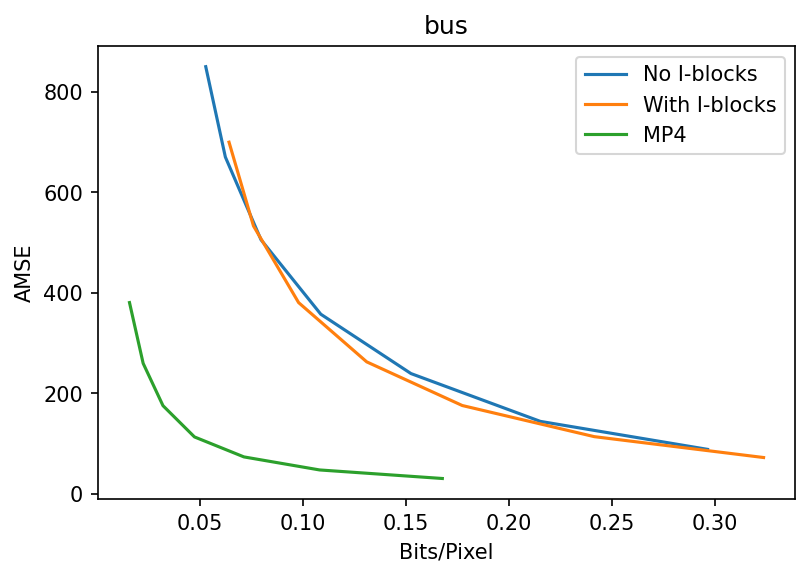

In [26]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_no_Iblocks), label="No I-blocks")
pylab.plot(*zip(*RD_with_Iblocks), label="With I-blocks")
pylab.plot(*zip(*RD_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()

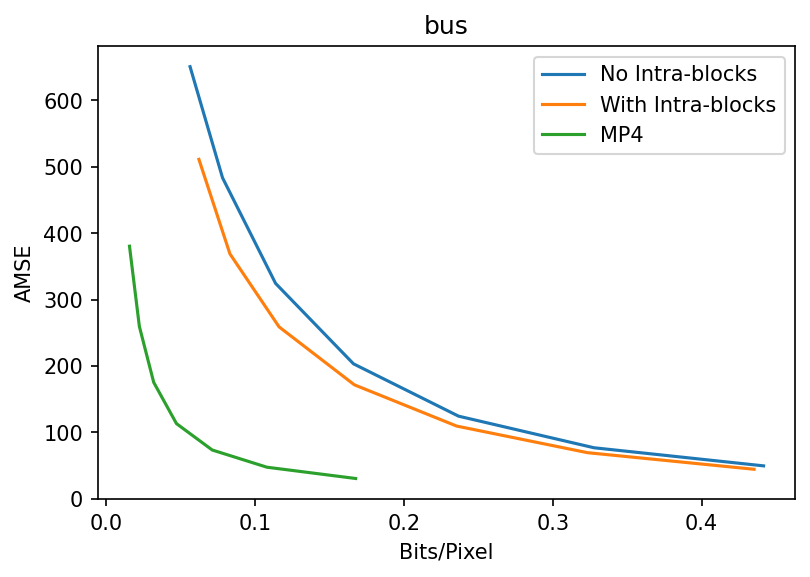

In [23]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_points_no_intrablocks), label="No Intra-blocks")
pylab.plot(*zip(*RD_points_with_intrablocks), label="With Intra-blocks")
pylab.plot(*zip(*RD_points_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()